In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [53]:
dna_data = pd.read_csv("Cleaned_Date_DNA_Data.csv")
culture_data = pd.read_csv("Cleaned_Date_culture_Data.csv")

In [55]:
culture_data.head()

,Unnamed: 0,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time
0,2231,113666.0,2016-08-04 08:30:00,Humboldt,1.0,1.0,1.0,41.90643,-87.703717,2016-08-04,08:30:00
1,2374,112689.0,2016-06-01 07:15:00,Calumet,629.0,1300.0,904.3,41.71420,-87.529900,2016-06-01,07:15:00
2,2375,112669.0,2016-06-01 08:00:00,Calumet,345.0,517.0,422.3,41.71420,-87.529900,2016-06-01,08:00:00
3,4980,109008.0,2013-05-26 00:00:00,57th Street,17.0,20.0,18.4,41.79110,-87.579700,2013-05-26,00:00:00
4,4983,93134.0,2015-07-07 00:00:00,Leone,727.0,727.0,727.0,42.01310,-87.663500,2015-07-07,00:00:00


In [4]:
test = "2016-08-04"

formatted = datetime.datetime.strptime(test, "%Y-%m-%d")

In [5]:
formatted.month

8

In [59]:
dna_data["Sample Month"] = ""

for index, row in dna_data.iterrows():
    
    date = row["Sample Date"]
    
    formatted = datetime.datetime.strptime(date, "%Y-%m-%d")
    
    dna_data.loc[index, "Sample Month"] = formatted.month
    
# using striptime: https://stackoverflow.com/questions/26105804/extract-month-from-date-in-python/26105888


In [56]:
culture_data["Sample Month"] = ""

for index, row in culture_data.iterrows():
    
    date = row["Sample Date"]
    
    formatted = datetime.datetime.strptime(date, "%Y-%m-%d")
    
    culture_data.loc[index, "Sample Month"] = formatted.month

In [57]:
culture_data.head()

,Unnamed: 0,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time,Sample Month
0,2231,113666.0,2016-08-04 08:30:00,Humboldt,1.0,1.0,1.0,41.90643,-87.703717,2016-08-04,08:30:00,8
1,2374,112689.0,2016-06-01 07:15:00,Calumet,629.0,1300.0,904.3,41.71420,-87.529900,2016-06-01,07:15:00,6
2,2375,112669.0,2016-06-01 08:00:00,Calumet,345.0,517.0,422.3,41.71420,-87.529900,2016-06-01,08:00:00,6
3,4980,109008.0,2013-05-26 00:00:00,57th Street,17.0,20.0,18.4,41.79110,-87.579700,2013-05-26,00:00:00,5
4,4983,93134.0,2015-07-07 00:00:00,Leone,727.0,727.0,727.0,42.01310,-87.663500,2015-07-07,00:00:00,7


In [60]:
dna_by_month = dna_data.groupby("Sample Month")
culture_by_month = culture_data.groupby("Sample Month")

In [69]:
dna_y_axis = dna_by_month["DNA Reading Mean"].mean()
dna_y_axis

Sample Month
5    294.675561
6    491.519486
7    627.044898
8    606.399228
9    441.428708
Name: DNA Reading Mean, dtype: float64

In [70]:
x_axis = ["May", "June", "July", "August", "September"]

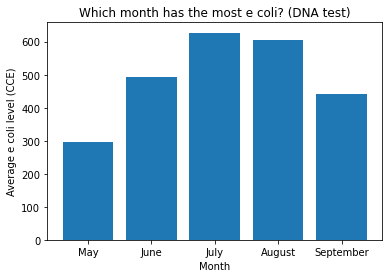

In [72]:
plt.bar(x_axis, dna_y_axis)

plt.title("Which month has the most e coli? (DNA test)")
plt.xlabel("Month")
plt.ylabel("Average e coli level (CCE)")

plt.show()

In [61]:
culture_y_axis = culture_by_month["Culture Reading Mean"].mean()
culture_y_axis

Sample Month
5     162.750043
6     131.254973
7     163.658208
8     160.541246
9     147.932780
10      1.000000
Name: Culture Reading Mean, dtype: float64

In [63]:
#dropping october
culture_y_axis=culture_y_axis.drop(labels=10)

In [64]:
x_axis = ["May", "June", "July", "August", "September"]

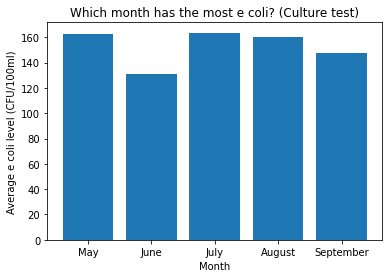

In [73]:
plt.bar(x_axis, culture_y_axis)


plt.title("Which month has the most e coli? (Culture test)")
plt.xlabel("Month")
plt.ylabel("Average e coli level (CFU/100ml)")

plt.show()

In [74]:
dna_by_date = dna_data.groupby("Sample Date")
culture_by_date = culture_data.groupby("Sample Date")

In [76]:
daily_dna_means = dna_by_date["DNA Reading Mean"].mean()
daily_culture_means = culture_by_date["Culture Reading Mean"].mean()

In [77]:
len(daily_dna_means)

433

In [20]:
dates = dna_data["Sample Date"].unique()

In [42]:
len(dates)

433

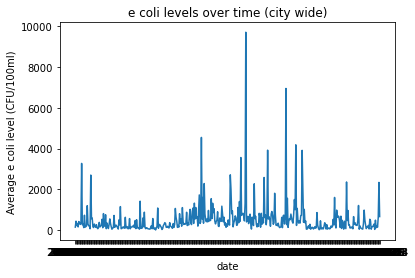

In [24]:
x_axis = dates
y_axis = daily_dna_means

plt.plot(x_axis, y_axis)


plt.title("e coli levels over time (city wide)")
plt.xlabel("date")
plt.ylabel("Average e coli level (CFU/100ml)")

plt.show()

In [78]:
daily_dna_means = daily_dna_means.to_frame()
daily_culture_means = daily_culture_means.to_frame()

In [79]:
daily_dna_means.reset_index(drop=False, inplace=True)
daily_culture_means.reset_index(drop=False, inplace=True)

In [81]:
daily_dna_means=daily_dna_means.rename(columns = {"Sample Date":"Date","DNA Reading Mean":"Citywide Mean E Coli Level"})

In [82]:
daily_culture_means.columns

Index(['Sample Date', 'Culture Reading Mean'], dtype='object')

In [84]:
daily_culture_means = daily_culture_means.rename(columns = {"Sample Date":"Date","Culture Reading Mean":"Citywide Mean E Coli Level"})

In [86]:
daily_dna_means.to_csv('DNA_daily_citywide_means.csv')
daily_culture_means.to_csv('culture_daily_citywide_means.csv')